In [1]:
from decouple import config
from qiskit import IBMQ
from datetime import datetime
import pprint
import json


In [2]:
# IBMQ.save_account(config('IBM_API_KEY'), overwrite=True)
IBMQ.load_account()
IBMQ.providers()
provider = IBMQ.get_provider(hub='strangeworks-hub', group='science-team', project='science-test')
print(provider.backends())

[<IBMQBackend('ibmq_montreal') from IBMQ(hub='strangeworks-hub', group='science-team', project='science-test')>]


In [3]:
from qiskit.opflow import Z, I

num_qubits = 4
hamiltonian = (Z ^ Z) ^ (I ^ (num_qubits - 2))
target_energy = -1

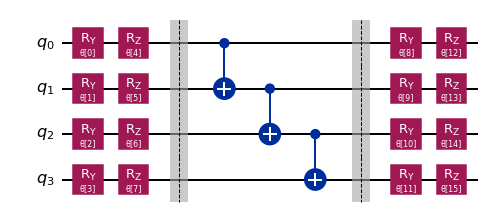

In [4]:
from qiskit.circuit.library import EfficientSU2

# the rotation gates are chosen randomly, so we set a seed for reproducibility
ansatz = EfficientSU2(num_qubits, reps=1, entanglement='linear', insert_barriers=True) 
ansatz.draw('mpl', style='iqx')

In [8]:
import numpy as np
from qiskit.algorithms.optimizers import SPSA

optimizer = SPSA(maxiter=50)

np.random.seed(10)  # seed for reproducibility
initial_point = np.random.random(ansatz.num_parameters)

In [6]:
intermediate_info = {
    'nfev': [],
    'parameters': [],
    'energy': [],
    'stddev': []
}

def callback(nfev, parameters, energy, stddev):
    # pprint.pprint(json.dumps([nfev, parameters, energy, stddev]))
    print(f"Energy: {energy}")
    intermediate_info['nfev'].append(nfev)
    intermediate_info['parameters'].append(parameters)
    intermediate_info['energy'].append(energy)
    intermediate_info['stddev'].append(stddev)

# Local VQE

In [7]:
from qiskit.providers.basicaer import QasmSimulatorPy  # local simulator
from qiskit.algorithms import VQE

local_vqe = VQE(ansatz=ansatz,
                optimizer=optimizer,
                initial_point=initial_point,
                quantum_instance=QasmSimulatorPy(),
                callback=callback)

In [8]:
local_result = local_vqe.compute_minimum_eigenvalue(hamiltonian)

/usr/local/pip-global/qiskit/utils/run_circuits.py:620: UserWarning: Option max_credits is not used by this backend
  return backend.run(circuits, **backend_options, **noise_config, **run_config)
Energy: 0.701171875
Energy: 0.7890625
Energy: 0.9082031250000001
Energy: 0.53515625
Energy: 0.8671875
Energy: 0.529296875
Energy: 0.654296875
Energy: 0.8984375
Energy: 0.677734375
Energy: 0.8125
Energy: 0.880859375
Energy: 0.634765625
Energy: 0.8203125
Energy: 0.765625
Energy: 0.8320312500000001
Energy: 0.73828125
Energy: 0.90234375
Energy: 0.6132812500000001
Energy: 0.7265624999999999
Energy: 0.826171875
Energy: 0.857421875
Energy: 0.7656249999999999
Energy: 0.8789062499999999
Energy: 0.513671875
Energy: 0.8886718750000001
Energy: 0.46484375
Energy: 0.505859375
Energy: 0.9179687499999999
Energy: 0.548828125
Energy: 0.9316406249999999
Energy: 0.92578125
Energy: 0.55859375
Energy: 0.8691406249999999
Energy: 0.478515625
Energy: 0.662109375
Energy: 0.8476562499999999
Energy: 0.8808593750000001
En

In [9]:
print('Eigenvalue:', local_result.eigenvalue)
print('Target:', target_energy)

Eigenvalue: -1.0
Target: -1


In [10]:
print('Mean error:', np.mean(intermediate_info['stddev']))

Mean error: 0.013951608120399287


In [11]:
print(intermediate_info['parameters'][0])

[ 0.57132064  0.22075195  0.83364823  0.54880388  0.29850701  0.02479665
 -0.00193714  0.96053071  0.36911084 -0.11166019  0.48535982  1.15339335
  0.20394827  0.71219226  1.01262096  0.81252607]


# IBMQ VQE

In [14]:
from qiskit import IBMQ

IBMQ.load_account()
IBMQ.providers()
provider = IBMQ.get_provider(hub='strangeworks-hub', group='science-team', project='science-test')
backend = provider.get_backend('ibmq_montreal')

ibmqfactory.load_account:WARNING:2021-06-03 10:16:24,463: Credentials are already in use. The existing account in the session will be replaced.


In [15]:
from qiskit.algorithms import VQE

ibmq_vqe = VQE(ansatz=ansatz,
                optimizer=optimizer,
                initial_point=initial_point,
                quantum_instance=backend,
                callback=callback)

In [16]:
ibmq_vqe.compute_minimum_eigenvalue(hamiltonian)

/Users/dylan/repos/qiskit-test/venv/lib/python3.8/site-packages/qiskit/utils/run_circuits.py:382: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = backend.run(qobj, **backend_options, **noise_config)


In [18]:
print(ibmq_vqe)

# Runtime VQE

In [12]:
from qiskit import IBMQ


In [9]:
IBMQ.load_account()
IBMQ.providers()
provider = IBMQ.get_provider(hub='strangeworks-hub', group='science-team', project='science-test')
print(provider.backends())

ibmqfactory.load_account:WARNING:2021-06-15 11:03:40,635: Credentials are already in use. The existing account in the session will be replaced.
[<IBMQBackend('ibmq_montreal') from IBMQ(hub='strangeworks-hub', group='science-team', project='science-test')>]


In [10]:
backend = provider.get_backend('ibmq_montreal')

In [11]:
intermediate_info = {
    'nfev': [],
    'parameters': [],
    'energy': [],
    'stddev': []
}

def callback(nfev, parameters, energy, stddev):
    print(f"Energy: {energy}")
    intermediate_info['nfev'].append(nfev)
    intermediate_info['parameters'].append(parameters)
    intermediate_info['energy'].append(energy)
    intermediate_info['stddev'].append(stddev)

In [12]:
measurement_error_mitigation = True

In [13]:
from qiskit_nature.runtime import VQEProgram

In [14]:
optimizer = {'name': 'SPSA',
             'maxiter': 50}

runtime_vqe = VQEProgram(ansatz=ansatz,
                         optimizer=optimizer,
                         initial_point=initial_point,
                         provider=provider,
                         backend=backend,
                         shots=1024,
                         measurement_error_mitigation=measurement_error_mitigation,
                         callback=callback)

In [15]:
runtime_result = runtime_vqe.compute_minimum_eigenvalue(hamiltonian)

Energy: 0.5883778167311592
Energy: 0.7452928109218331
Energy: 0.4594141931515584
Energy: 0.2797551730844739
Energy: -0.06323847553222661
Energy: -0.000108795253770555
Energy: -0.182843913237669
Energy: -0.1053398843131319
Energy: -0.1158362880826323
Energy: -0.13319666009927683
Energy: -0.08131120172279166
Energy: -0.22702728134655925
Energy: -0.41332644832806936
Energy: -0.46096539665909836
Energy: -0.4637597429462904
Energy: -0.505396536376537
Energy: -0.5306735827105009
Energy: -0.4368643814677961
Energy: -0.457297146404122
Energy: -0.5240512672256404
Energy: -0.5393477687104911
Energy: -0.5469590432393561
Energy: -0.5936181732402407
Energy: -0.577849246862833
Energy: -0.5321729000152865
Energy: -0.5832671345684347
Energy: -0.5594573743375322
Energy: -0.584595613859757
Energy: -0.5800178903982152
Energy: -0.6400366436721476
Energy: -0.603180955423327
Energy: -0.47549483893570876
Energy: -0.6817309654892841
Energy: -0.7377755359736121
Energy: -0.6873195381267446
Energy: -0.8177225650

In [17]:
import pickle
pickle.dump(runtime_result, open("results/vqe.p", "wb"))


In [19]:
dir(runtime_result)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_aux_operator_eigenvalues',
 '_cost_function_evals',
 '_eigenstate',
 '_eigenvalue',
 '_job_id',
 '_optimal_parameters',
 '_optimal_point',
 '_optimal_value',
 '_optimizer_evals',
 '_optimizer_history',
 '_optimizer_time',
 'aux_operator_eigenvalues',
 'combine',
 'cost_function_evals',
 'eigenstate',
 'eigenvalue',
 'job_id',
 'optimal_parameters',
 'optimal_point',
 'optimal_value',
 'optimizer_evals',
 'optimizer_history',
 'optimizer_time']